In [2]:
import utils
from train import Trainer, Tuner
from pathlib import Path
from model.bigger_leaky_unet import BiggerLeakyUnet
from IPython.display import Image
from IPython.core.display import HTML 

%load_ext autoreload
%autoreload 2

## `BiggerLeakyUnet`

### learning rate search

Let's try to find an optimal learning rate for this model. We start search from a broad range of rates: `(1e-1, 1e-2, 1e-3, 1e-4, 1e-5)` and train our model for just 3 epochs. We then try to look into rates around the best one.

We may see that it's not easy to find a good learning rate. Basically *nothing works* except `1e-5` and maybe `1e-6` (for 3 epochs). Especially *bad* choice - `1e-4` (again, at least for 3 epochs). So probably it's not going to be easy to train as well.

In [15]:
Image(url='http://cs231n.github.io/assets/nn3/learningrates.jpeg', width=200, height=200)

In [3]:
dir_path = Path('experiments/bigger_leaky_unet')

In [9]:
utils.load_history(dir_path / 'history_learning_rate_1e-05.pickle')

{'loss': [-0.36613268660893783, -0.6461856660710049, -0.6998235671309843],
 'jaccard_coef': [0.36613268, 0.6461857, 0.69982356],
 'val_loss': [-0.5244044582525801, -0.6922196216564841, -0.7230210507928635],
 'val_jaccard_coef': [0.52440447, 0.69221944, 0.7230212],
 'lr': [1e-05, 1e-05, 1e-05]}

In [11]:
utils.load_history(dir_path / 'history_learning_rate_1e-06.pickle')

{'loss': [-0.22511318388124474, -0.38678285334699797, -0.3900437002000818],
 'jaccard_coef': [0.22511329, 0.38678303, 0.39004377],
 'val_loss': [-0.39303664845849556,
  -0.40114028743220115,
  -0.40676283229386945],
 'val_jaccard_coef': [0.3930366, 0.4011402, 0.4067628],
 'lr': [1e-06, 1e-06, 1e-06]}

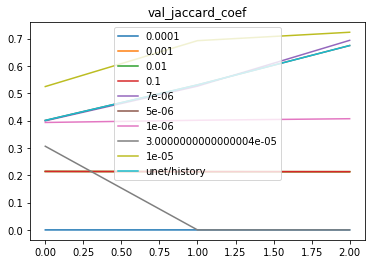

In [13]:
utils.plot_metric(metric='val_jaccard_coef', dir_path=dir_path)